In [1]:
# Install required Qiskit packages
!pip install qiskit qiskit-aer --quiet

In [2]:
!pip install pylatexenc --quiet

# **Task 1 & 4: Modified 3-Qubit Circuit with Barrier**

--- Qiskit OpenQASM 3 Demonstration ---


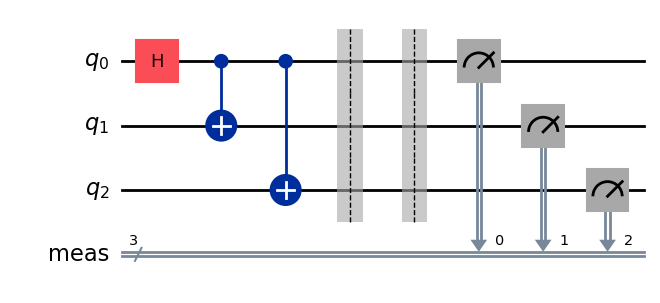

In [3]:

# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3 # For OpenQASM 3 export
import io # Used to capture print output for analysis

print("--- Qiskit OpenQASM 3 Demonstration ---")

# 1. Modify the circuit to have 3 qubits and apply a different gate sequence.
# We will create a 3-qubit GHZ state.
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

# 4. Add a barrier and observe how it appears in the QASM code.
# We add the barrier before the measurement.
qc.barrier()

# Add measurement (required for simulation in task 5)
qc.measure_all()
display(qc.draw("mpl"))


# **Task 2: Generated OpenQASM 3 Code**

In [4]:

qasm_code = qasm3.dumps(qc)
print(qasm_code)


OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
cx q[0], q[2];
barrier q[0], q[1], q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];



# **Task 3: QASM Syntax Identification**

In [5]:

# 3. Identify how Hadamard and CNOT operations are represented in QASM syntax.
print("Based on the OpenQASM 3 code generated above:")
print(f"* **Hadamard (h) operation:** Is represented as `h q[0];`")
print(f"* **CNOT (cx) operation:** Is represented as `cx q[0], q[1];` and `cx q[0], q[2];`")
print(f"* **Barrier (from Task 4):** Is represented as `barrier q[0], q[1], q[2];`")


Based on the OpenQASM 3 code generated above:
* **Hadamard (h) operation:** Is represented as `h q[0];`
* **CNOT (cx) operation:** Is represented as `cx q[0], q[1];` and `cx q[0], q[2];`
* **Barrier (from Task 4):** Is represented as `barrier q[0], q[1], q[2];`


# **Task 5: Simulation and Comparison**

In [6]:



# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

print("\nModified Circuit Simulation Result (GHZ State):")
print(counts)

print("\nComparison:")
print("The original 2-qubit circuit created a Bell state (e.g., |00> + |11>), which would result in counts split between '00' and '11'.")
print("This modified 3-qubit circuit creates a GHZ state (|000> + |111>), entangling all three qubits. The simulation results correctly show counts clustered around '000' and '111', demonstrating this three-way entanglement.")


Modified Circuit Simulation Result (GHZ State):
{'000': 524, '111': 500}

Comparison:
The original 2-qubit circuit created a Bell state (e.g., |00> + |11>), which would result in counts split between '00' and '11'.
This modified 3-qubit circuit creates a GHZ state (|000> + |111>), entangling all three qubits. The simulation results correctly show counts clustered around '000' and '111', demonstrating this three-way entanglement.
